 #  A Whale off the Port(folio)
 ---

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Import libraries for data cleaning and analysis
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set file path for the CSV file containing original data
file_path = Path("Resources/whale_returns.csv")

In [3]:
# Read in 'Whale Returns' CSV file
whale_returns_csv = pd.read_csv(file_path)
whale_returns_csv.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# View column data types by using the 'dtypes' attribute to list the column data types
whale_returns_csv.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
# Use the 'as_type' function to convert 'Date' from 'object' to 'datetime64'
whale_returns_csv['Date'] = whale_returns_csv['Date'].astype('datetime64')

# Use 'dtypes' attribute to ensure conversion processed correctly
whale_returns_csv.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [6]:
# Identify the number of rows
whale_returns_csv.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [7]:
# Identify null records within DataFrame
whale_returns_csv.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Remove null records from DataFrame using the 'dropna()' function
whale_returns_csv = whale_returns_csv.dropna()

# Confirm removal of null records using the 'isnull()' and 'sum()' function(s)
whale_returns_csv.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
# Check for duplicated rows using the 'duplicated' function
whale_returns_csv.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
1055    False
1056    False
1057    False
1058    False
1059    False
Length: 1059, dtype: bool

In [10]:
# Sort datetime index in ascending order (past to present)
whale_returns_csv.sort_index(inplace=True)

In [11]:
# Inspect the head of the revised DataFrame using the 'head()' function
whale_returns_csv.head(10)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147
8,2015-03-12,0.008265,0.010272,0.013117,0.010801
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142
10,2015-03-16,0.007901,0.003583,0.007953,0.008055


In [12]:
# Inspect the tail of the revised DataFrame using the 'tail' function
whale_returns_csv.tail(10)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1050,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
1051,2019-04-18,0.001448,0.001222,0.000582,0.001916
1052,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088
1053,2019-04-23,0.007167,0.003485,0.006472,0.013278
1054,2019-04-24,0.002284,0.001009,-0.004000,-0.006386
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
1059,2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [13]:
# Export clean data into CSV file




## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [14]:
# Set the file path for the CSV file containing original data
file_path = Path("Resources/algo_returns.csv")

In [15]:
# Read in 'Algorithim Returns' CSV file 
algo_returns_df = pd.read_csv(file_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

# Inspect the first 10 rows of the DataFrame using the 'head()' function
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [16]:
# Identify null records within the DataFrame
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [17]:
# Use the 'fillna()' function to replace null records with '0'
algo_returns_df = algo_returns_df.fillna(0)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [18]:
# Re-inspect the first 10 rows of the DataFrame 
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,0.000000
2014-05-29,0.003978,0.000000
2014-05-30,0.004464,0.000000
2014-06-02,0.005692,0.000000
2014-06-03,0.005292,0.000000
2014-06-04,-0.001838,0.000000
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [19]:
# Inspect tail of the DataFrame
algo_returns_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [20]:
# Inspect data types using the 'dtypes()' function
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [21]:
# Check for duplicated rows using the 'duplicated' function
algo_returns_df.duplicated()

Date
2014-05-28    False
2014-05-29    False
2014-05-30    False
2014-06-02    False
2014-06-03    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1241, dtype: bool

In [24]:
# Calculate daily returns 
algo_daily_returns = algo_returns_df.pct_change()
algo_daily_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,NaN,NaN
2014-05-29,1.280156,NaN
2014-05-30,0.122192,NaN
2014-06-02,0.275137,NaN
2014-06-03,-0.070296,NaN


In [26]:
# Replace null values with - from the new DataFrame
algo_daily_returns = algo_daily_returns.fillna(0)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [27]:
sp_tsx_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_df = sp_tsx_df.sort_index()
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [28]:
sp_tsx_df.dtypes

Close    object
dtype: object

In [29]:
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '', regex=False)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [30]:
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '', regex=False)
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [35]:
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float64")
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [36]:
# Inspect DataFrame for null records
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

In [37]:
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

<AxesSubplot:xlabel='Date'>

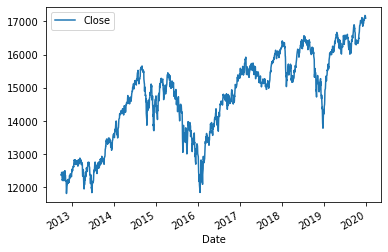

In [38]:
# Plot daily close
sp_tsx_df.plot()

In [39]:
# Calculate 'Daily Returns' 
# Output assigned to new DataFrame 'sp_tsx_daily_returns'
sp_tsx_daily_returns = sp_tsx_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [40]:
sp_tsx_daily_returns = sp_tsx_daily_returns.fillna(0)

In [41]:
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

<AxesSubplot:xlabel='Date'>

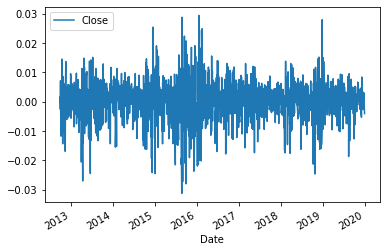

In [42]:
# Plot daily returns
sp_tsx_daily_returns.plot()

In [43]:
# Rename `Close` Column to be specific to this portfolio (closing prices)
sp_tsx_df = sp_tsx_df.rename(columns = {'Close':'S&P TSX'})
sp_tsx_df.head()

,S&P TSX
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [44]:
# Rename 'Close' column to be specific to this portfolio (daily returns)
sp_tsx_daily_returns= sp_tsx_daily_returns.rename(columns = {'Close':'S&P TSX'})
sp_tsx_df.head()

,S&P TSX
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Plot daily returns of all portfolios


#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios


### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!